<div style="float:right; padding-top: 15px; padding-right: 15px">
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="250">
        </a>
    </div>
</div>

## 0. python imports & setup

In [2]:
# imports
import numpy as np
import pandas as pd

In [3]:
# dataviz
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [4]:
# mpl.rcParams['figure.figsize'] = (12.0, 8.0)

## 1. data loading

In [6]:
train = pd.read_csv('../data/diamonds_train.csv')
test = pd.read_csv('../data/diamonds_predict.csv')
sample_sub = pd.read_csv('../data/sample_submission.csv')

## 2. exploratory data analysis (eda)

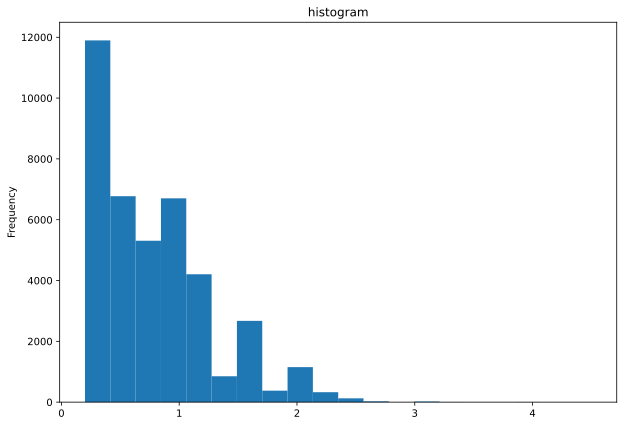

In [7]:
# ejemplo
train['carat'].plot(kind='hist', bins=20, title='histogram', figsize=(10, 7));

## 3. modeling (linear regression baseline)

In [8]:
target = 'price'
cat_features = ['cut', 'color', 'clarity']
num_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

for cat_feat in cat_features:
    train[cat_feat] = train[cat_feat].astype('category')
    test[cat_feat] = test[cat_feat].astype('category')
    
cat_df = pd.get_dummies(train[cat_features])
num_df = train.loc[:,num_features]
train_df = pd.concat([cat_df, num_df], axis=1)

cat_df = pd.get_dummies(test[cat_features])
num_df = test.loc[:,num_features]
test_df = pd.concat([cat_df, num_df], axis=1)


features = list(cat_df.columns) + list(num_df.columns)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(train_df.loc[:,features].values)
y = train[target]

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=X, y=y)

LinearRegression()

## 4. make submission

In [12]:
X_test = scaler.transform(test_df.loc[:,features].values)
y_hat = model.predict(X_test).clip(0, 30000)
submission = pd.DataFrame({'id': test['id'], 'price': y_hat})
submission.to_csv('submission.csv', index=False)

<div style="padding-top: 25px; float: right">
    <div>    
        <i>&nbsp;&nbsp;© Copyright by</i>
    </div>
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="125">
        </a>
    </div>
</div>